In [1]:
from scipy import signal
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *
import tqdm

In [2]:
N = 1000
data = []
with open('data/webtext.train.nll', 'r') as f:
    count = 0
    for line in f:
        line = line.strip()
        num = list(map(float, line.split()))
        data.append(num)
        count += 1
        if count == N:
            break

print(len(data))

1000


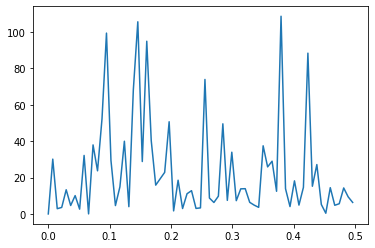

In [4]:
f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

In [3]:
freqs, powers = [], []
for i in tqdm.tqdm(range(len(data))):
    f, p = signal.periodogram(data[i])
    freqs.append(f)
    powers.append(p)

100%|██████████| 1000/1000 [00:00<00:00, 2650.14it/s]


In [47]:
# print(list(map(len, freqs)))
# print(list(map(len, powers)))
print(type(freqs[0]))

<class 'numpy.ndarray'>


In [4]:
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df

,freq,power
0,0.000000,1.140249e-29
1,0.007299,3.013445e+01
2,0.014599,2.876527e+00
3,0.021898,3.570291e+00
4,0.029197,1.328215e+01
...,...,...
292322,0.495601,8.548133e+00
292323,0.496579,4.456994e+00
292324,0.497556,9.693481e+00
292325,0.498534,5.709272e+00


In [6]:
df_np = df.to_numpy()
print(df_np.shape)
np.savetxt('plot/webtext_freq_power_1k.csv', df_np, delimiter=',')

(292327, 2)


In [39]:
(
    ggplot(df, aes(x='freq', y='power'))
    + geom_smooth() + geom_point()
)

TypeError: set_ticks() takes 2 positional arguments but 3 were given